In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df["Genre"].value_counts(normalize=True)

Genre
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


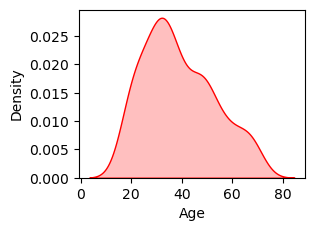

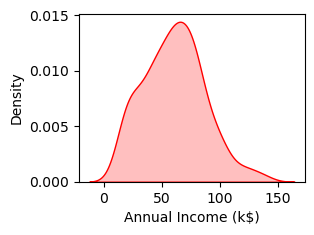

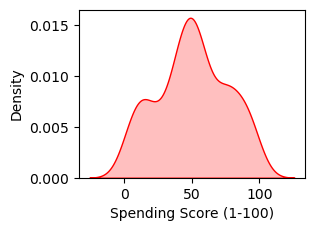

In [6]:
List = [ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in List:
    plt.figure()
    plt.subplot(2,2,4)
    sns.kdeplot(df[i],color="red",shade=True)

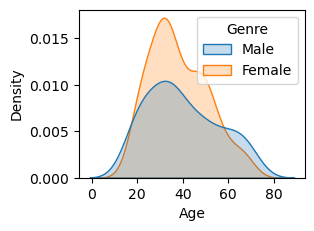

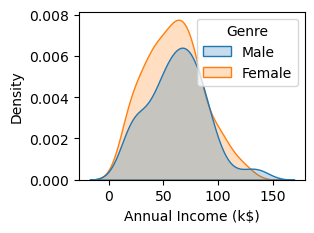

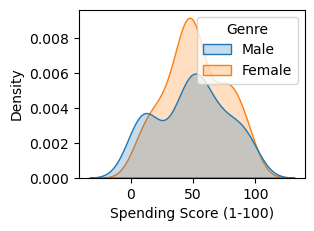

In [7]:
List = [ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in List:
    plt.figure()
    plt.subplot(2,2,4)
    sns.kdeplot(x= df[i],hue=df["Genre"],shade=True);

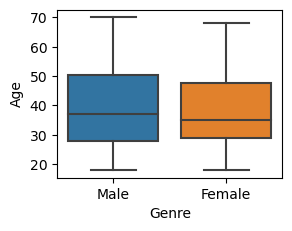

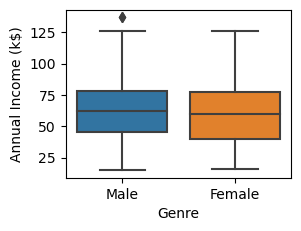

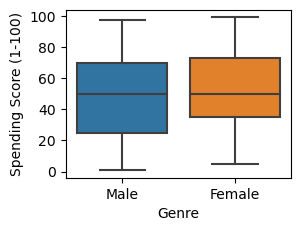

In [8]:
List = [ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in List:
    plt.figure()
    plt.subplot(2,2,4)
    sns.boxplot(data=df,x="Genre",y=df[i])

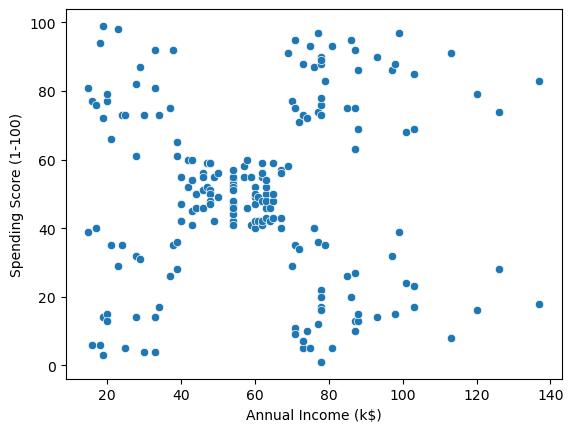

In [9]:
sns.scatterplot(data=df,x="Annual Income (k$)", y = "Spending Score (1-100)");

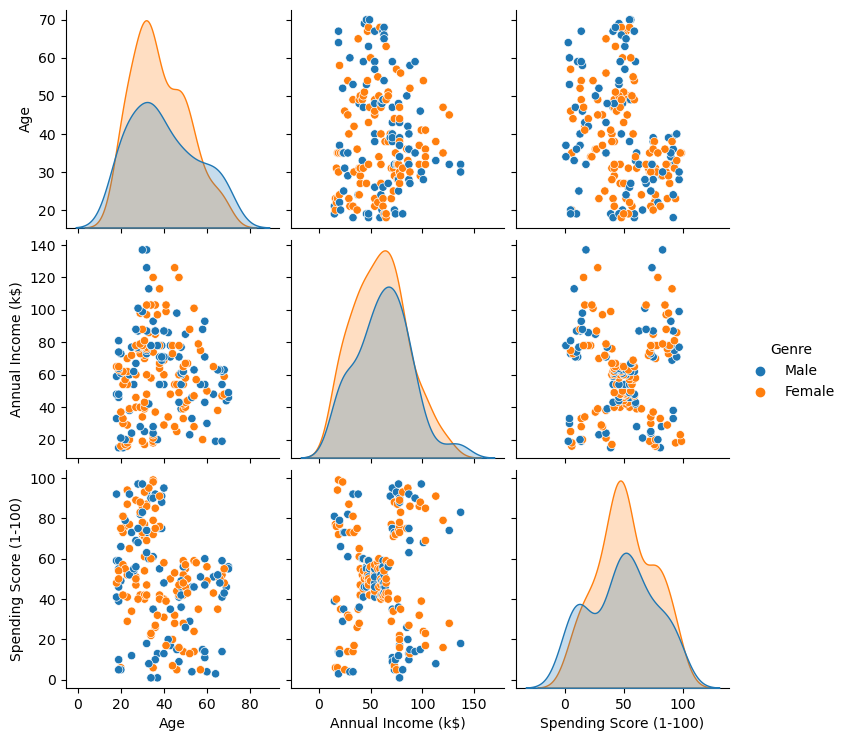

In [17]:
#df = df.drop("CustomerID",axis=True)
sns.pairplot(df,hue='Genre');

In [18]:
df.groupby(['Genre'])[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [25]:
df_col = df.select_dtypes(include="number")

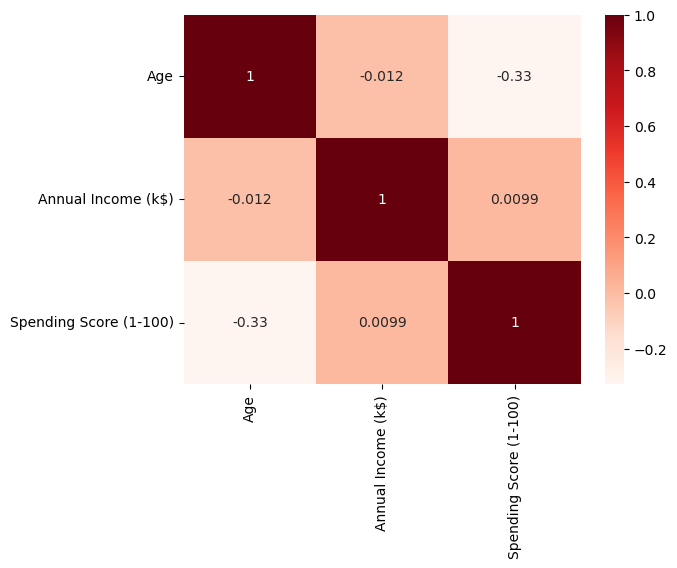

In [27]:
sns.heatmap(df_col.corr(),annot=True,cmap='Reds');

In [34]:
#Univariate
clu = KMeans(n_clusters=6)

In [35]:
clu.fit(df[["Annual Income (k$)"]])

KMeans(n_clusters=6)

In [36]:
clu.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4,
       4, 4])

In [37]:
df["Income"] = clu.labels_
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Income
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,3
3,Female,23,16,77,3
4,Female,31,17,40,3


In [38]:
df["Income"].value_counts()

Income
5    48
1    42
2    42
3    32
0    28
4     8
Name: count, dtype: int64

In [39]:
clu.inertia_

5050.9047619047615

In [41]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[["Annual Income (k$)"]])
    inertia_scores.append(kmeans.inertia_)

In [42]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3955.256654456655,
 2827.308424908427,
 2229.5897047397048,
 1734.1677489177496]

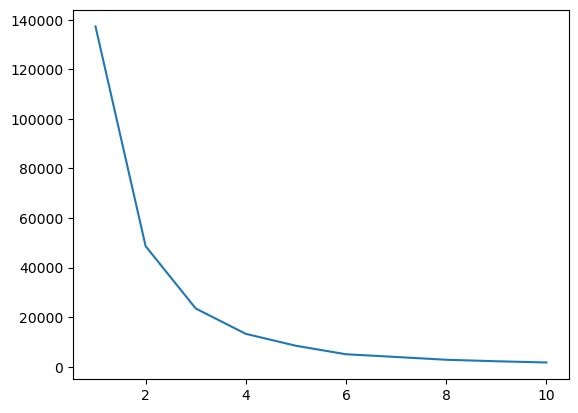

In [44]:
plt.plot(range(1,11),inertia_scores);

In [51]:
grp = df.groupby('Income')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean();
grp

,Age,Annual Income (k$),Spending Score (1-100)
Income,,,
0,38.214286,93.000000,50.928571
1,43.000000,42.238095,50.666667
2,35.428571,75.095238,51.095238
3,34.906250,22.000000,49.656250
4,36.500000,124.000000,49.625000
5,41.604167,60.083333,49.041667


In [88]:
#Bivariate
clu2 = KMeans(n_clusters=5)
clu2.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])

KMeans(n_clusters=5)

In [89]:
df['Spending and Income'] = clu2.labels_
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Income,Spending and Income
0,Male,19,15,39,3,3
1,Male,21,15,81,3,2
2,Female,20,16,6,3,3
3,Female,23,16,77,3,2
4,Female,31,17,40,3,3


In [90]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[["Annual Income (k$)"]])
    inertia_scores2.append(kmeans.inertia_)


In [91]:
inertia_scores2

[1734.1677489177496,
 1734.1677489177496,
 1734.1677489177496,
 1734.1677489177496,
 1734.1677489177496,
 1734.1677489177496,
 1734.1677489177496,
 1734.1677489177496,
 1734.1677489177496,
 1734.1677489177496]

In [103]:
centers = pd.DataFrame(clu2.cluster_centers_)
centers.columns = ["x","y"]

In [107]:
pd.crosstab(df['Spending and Income'],df['Genre'],normalize='index')

Genre,Female,Male
Spending and Income,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.590909,0.409091
3,0.608696,0.391304
4,0.457143,0.542857


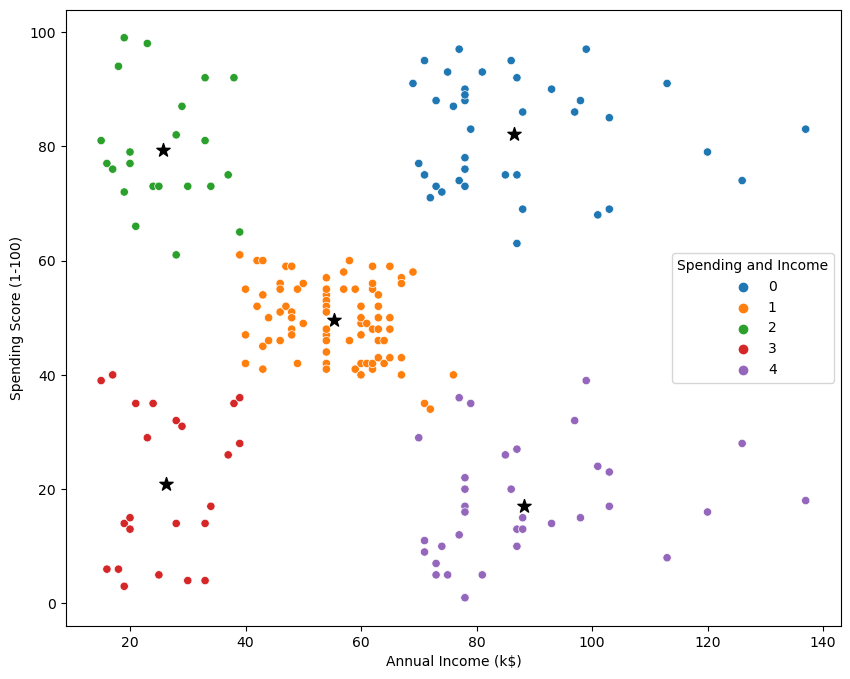

In [104]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y = centers['y'],s=100,c = 'black',marker='*')
sns.scatterplot(data = df, x="Annual Income (k$)", y = "Spending Score (1-100)", hue = "Spending and Income", palette = "tab10");
plt.save("Clusters.png")

In [108]:
#Multivariant
from sklearn.preprocessing import StandardScaler

In [109]:
scale = StandardScaler()

In [112]:
df_new= pd.get_dummies(df,drop_first=True)
df_new.head()

,Age,Annual Income (k$),Spending Score (1-100),Income,Spending and Income,Genre_Male
0,19,15,39,3,3,True
1,21,15,81,3,2,True
2,20,16,6,3,3,False
3,23,16,77,3,2,False
4,31,17,40,3,3,False


In [113]:
df_new = df_new[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male']]

In [114]:
df_new = pd.DataFrame(scale.fit_transform(df_new))

In [117]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(df_new)
    inertia_scores3.append(kmeans.inertia_)